In [97]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [98]:
df = pd.read_csv('../datasets/penguins_raw.csv',index_col=0)

In [99]:
# drop all rows with Body Mass NaN
df = df.dropna(subset=['Body Mass (g)'])
df.drop(columns=['Comments'], inplace=True)

In [100]:
target = df.pop('Body Mass (g)')
features = df

In [101]:
for obj in df.select_dtypes('object'):
    features[obj] = features[obj].factorize()[0]
features = features.fillna(features.median())

In [102]:
discrete_features = features.dtypes == 'int64'

<Axes: >

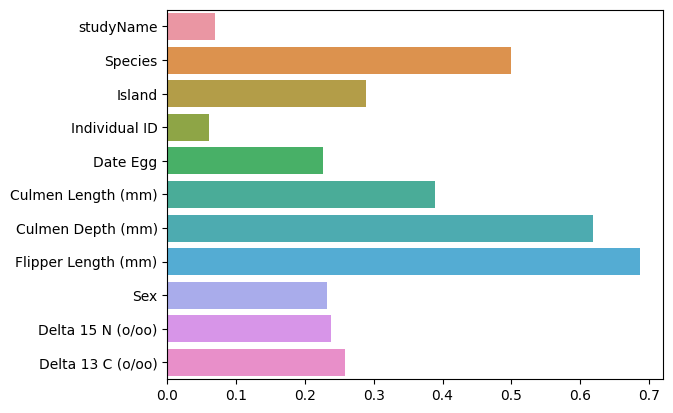

In [103]:
# calculate mutual information
mi = mutual_info_regression(features, target, random_state=0, discrete_features=discrete_features)
import seaborn as sns
# sns.barplot(x=mi, y=features.columns)
# drop features with low mutual information = 0.0
low_mi_features = features.columns[mi < 0.01]
features.drop(columns=low_mi_features, inplace=True)
# replot with remaining features
discrete_features = features.dtypes == 'int64'
mi = mutual_info_regression(features, target, random_state=0, discrete_features=discrete_features)
mi_score = pd.Series(mi, name="MI Scores", index=features.columns)
mi_score = mi_score.sort_values(ascending=False)

<Axes: xlabel='MI Scores'>

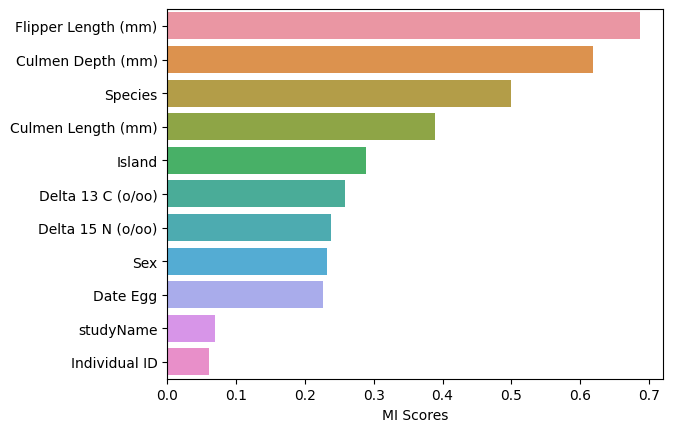

In [105]:
sns.barplot(x=mi_score, y=mi_score.index)

In [2]:
from bisect import bisect_left
bisect_left([1,2,3],1,2)

2

In [4]:
x = [1,2,3]
a, b = x.pop(), x.pop()
a,b,x

(3, 2, [1])